# PROJECT TITLE 
## customer churn prediction model


# PROJECT OBJECTIVE 
This project is tailored specifically for a Telecommunication Company. Leveraging machine learning models and advanced analytics, this project aims to  understand patterns and forecast customer churn rates within the company's subscriber base.Learn more about classification models and help the client, a telecommunication company, to understand their data.
This will help in finding the lifetime value of each customer and know what factors affect the rate at which customers stop using their services.



## 1. Business understanding

### EXPLANATION OF FEATURES
1. customerID: A unique identifier assigned to each customer
2. gender: Indicates the gender of the customer,categorized as male or female	
3. SeniorCitizen: This demographic information helps segment customers based on age.	
4. Partner: Indicates whether the customer has a partner
5. Dependents: Indicates whether the customer has dependents (e.g., children or others relying on their service)	
6. tenure: Represents the length of time (usually in months) that the customer has been subscribed to the service.
7. PhoneService: Indicates whether the customer has subscribed to phone services provided by the company.
8. MultipleLines: Indicates whether the customer has multiple phone lines as part of their service package.
9. InternetService: Specifies the type of internet service subscribed to by the customer 
10. OnlineSecurity: Indicates whether the customer has an online security add-on as part of their internet service.
11. OnlineBackup: Indicates whether the customer has an online backup service for data as part of their internet package.	
12. DeviceProtection: Indicates whether the customer has device protection services (e.g., insurance or warranty) for their devices.
13. TechSupport: Indicates whether the customer has technical support services included in their subscription.
14. StreamingTV: Indicates whether the customer has subscribed to streaming TV services from the provider.
15. StreamingMovies: Indicates whether the customer has subscribed to streaming movie services from the provider.
16. Contract: Specifies the type of contract the customer has.	
17. PaperlessBilling: Indicates whether the customer receives electronic bills instead of paper bills.	
18. PaymentMethod: Specifies the method the customer uses to make payments.	
19. MonthlyCharges: Represents the amount charged to the customer monthly for the subscribed services.	
20. TotalCharges: Represents the total amount charged to the customer over their entire tenure.
21. Churn: The target variable indicating whether the customer churned (left the service) or not.

### HYPOTHESIS
**Null Hypothesis** : There is no significant difference in churn rate based on monthly charges.     
**Alternative Hypothesis**: Customers with higher monthly charges are more likely to churn.

### RESEARCH QUESTIONS
1. Among customers who have churned, which type of contract is most prevalent? 
2. Which gender has the higest rate of churning
3. Is there a correlation between total charges and the type of contract? (Bar chart)
4. What is the percentage breakdown of customers who have left the company? (Pie chart)
5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)
6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)





## 2. Data Understanding

### LIBRARY IMPORTATION

In [1]:
#Data handling 
import pandas as pd 
import numpy as np

from dotenv import dotenv_values 
import pyodbc

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




import warnings
 
warnings.filterwarnings('ignore')


### LOAD DATASET

the first dataset is accessible remotely on a database.

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVERNAME")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
query= "select * from dbo.LP2_Telco_churn_first_3000"
data1= pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


second dataset is stored in a repository on github

In [5]:
data2= pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


third dataset is the test data and it's found in a google drive in a csv file named 'LP2_Telco-churn-second-2000'

In [6]:

data3= pd.read_csv('Telco-churn-second-2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Exploratory data analysis

Assesing the first dataset

In [7]:
data1.shape

(3000, 21)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
data1.duplicated().sum()

0

In [10]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [11]:
data1['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
data1['Contract'].value_counts()

Contract
Month-to-month    1641
Two year           746
One year           613
Name: count, dtype: int64

In [13]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:
data1['InternetService'].value_counts()

InternetService
Fiber optic    1343
DSL            1006
No              651
Name: count, dtype: int64

In [15]:
data1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [16]:
data1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
data1['tenure'].max() #to check for the customers who have stayed the longest with the company 

72

In [18]:
data1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Assesing the second dataset

In [19]:
data2.shape

(2043, 21)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [21]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
data2.duplicated().sum()

0

In [23]:
data2['Contract'].unique()


array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [24]:
data2['Contract'].value_counts()


Contract
Month-to-month    1103
Two year           498
One year           442
Name: count, dtype: int64

In [25]:
data2['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
data2['InternetService'].value_counts()

InternetService
Fiber optic    905
DSL            709
No             429
Name: count, dtype: int64

In [27]:
data2['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [28]:
data2['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
data2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [30]:
data2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Convert to numeric, coerce errors to NaN
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')


Combining the training datasets, that is the first and second dataset. This is what we are going to use in training the models we are going to build.

we notice that in the first dataset some categorical columns are in boolean values 'True' and 'False' but in the second datasets values are in 'Yes' and 'No' format. therefore we need to change that so that we will be able to concatinate them.

In [31]:

# Replace True/False values with Yes/No
data1.replace({True: 'Yes', False: 'No'}, inplace=True)

data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [33]:
trn_data= pd.concat([data1, data2], axis=0)
trn_data.reset_index(drop=True, inplace=True)
trn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [34]:
trn_data.shape

(5043, 21)

In [35]:
(trn_data['tenure']==72).sum()  #out of 3000 customers 167 stayed the longest with the company (6 years)

257

In [36]:
(trn_data['tenure']== 0).sum()    #customers who stayed for less than a month 

8

In [37]:
trn_data[trn_data['tenure']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,None,...,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,None,...,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,,No


In [39]:
trn_data.duplicated().sum()

0

In [43]:
#summarry statistics
trn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775000,70.550003,90.050003,118.650002
TotalCharges,5043.0,2297.877058,2267.154688,0.0,411.600004,1396.799973,3864.700000,8510.400000
TotalCharge,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
trn_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,4,No,2525
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'TotalCharge'}>]], dtype=object)

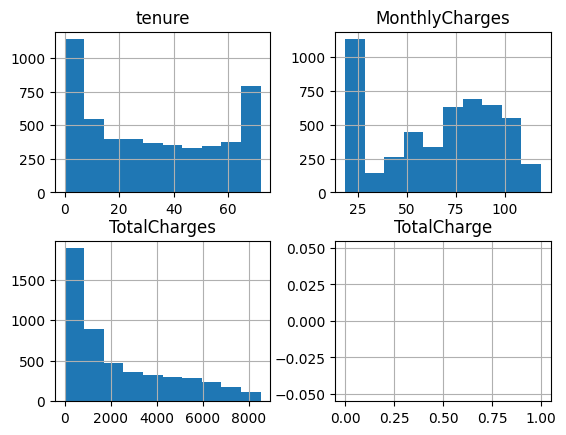

In [45]:
trn_data.hist()

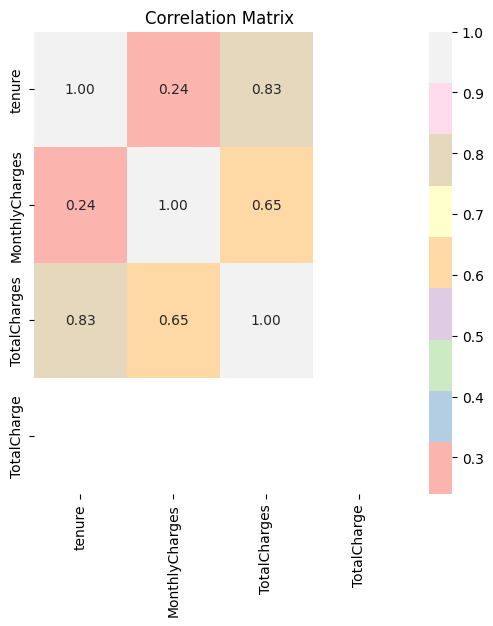

In [46]:

# Select numerical columns for correlation
numerical_columns = trn_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Answering analytical questions 

1. Among customers who have churned, which type of contract is most prevalent? (Bar chart)

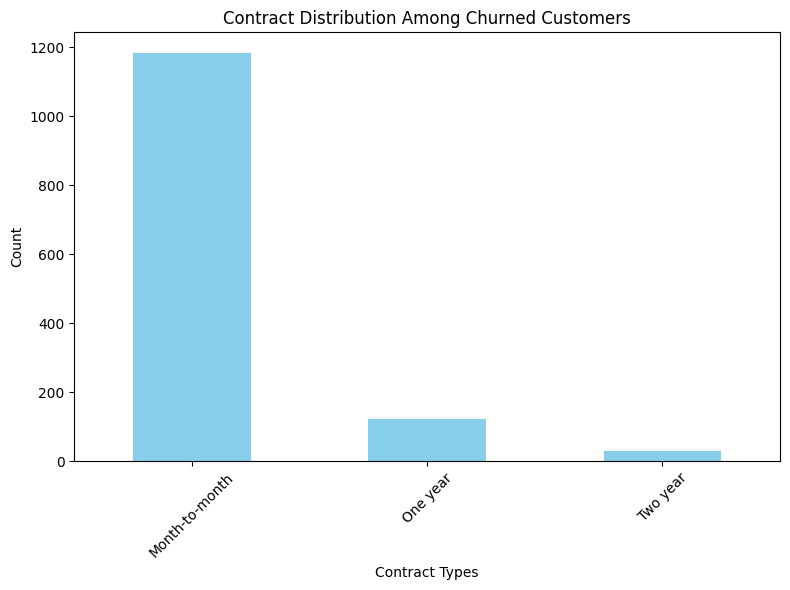

In [55]:

churned_customers = trn_data[trn_data['Churn'] == 'Yes'].reset_index()


# Count the most prevalent type of contract among churned customers
contract_counts = churned_customers['Contract'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Contract Distribution Among Churned Customers')
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



customers with a monthly renewable contract churn more compared to 1 year and 2 year contract

2. Which gender has the higest rate of churning


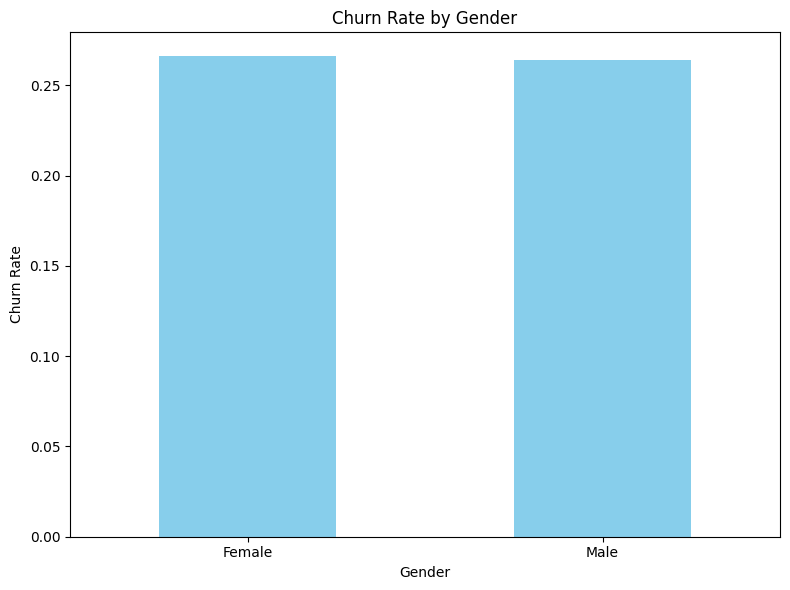

In [49]:

# Calculate churn rates by gender
churn_rates = trn_data.groupby('gender')['Churn'].value_counts(normalize=True).loc[:, 'Yes']

# Create a bar plot for churn rates by gender
plt.figure(figsize=(8, 6))
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


churning rate between the 2 genders is almost the same

3. Is there a correlation between total charges and the type of contract? (Bar chart)


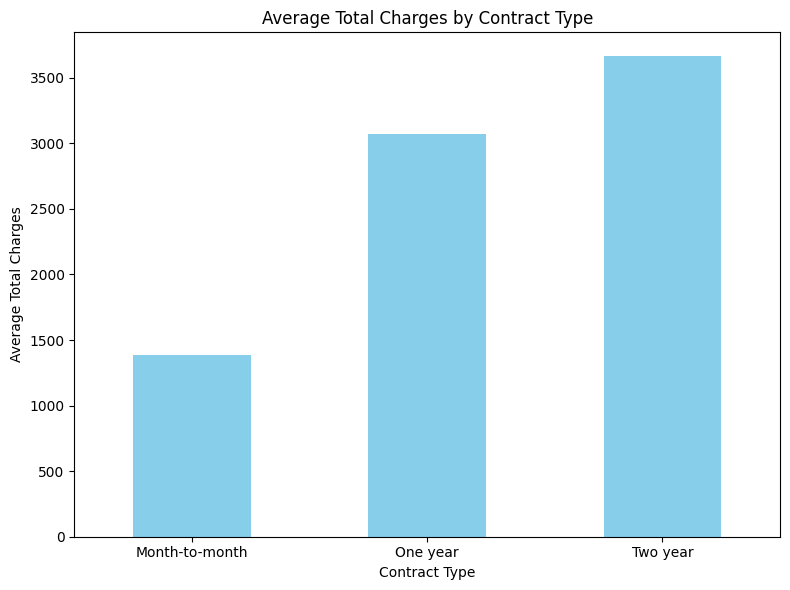

In [50]:

avg_total_charges = trn_data.groupby('Contract')['TotalCharges'].mean()

# Create a bar plot for average total charges by contract type
plt.figure(figsize=(8, 6))
avg_total_charges.plot(kind='bar', color='skyblue')
plt.title('Average Total Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


because cust with a 2 year contract churn less that means they generate more revenue for the company i.e they have the highest avg total charges

4. What is the percentage breakdown of customers who have left the company? (Pie chart)


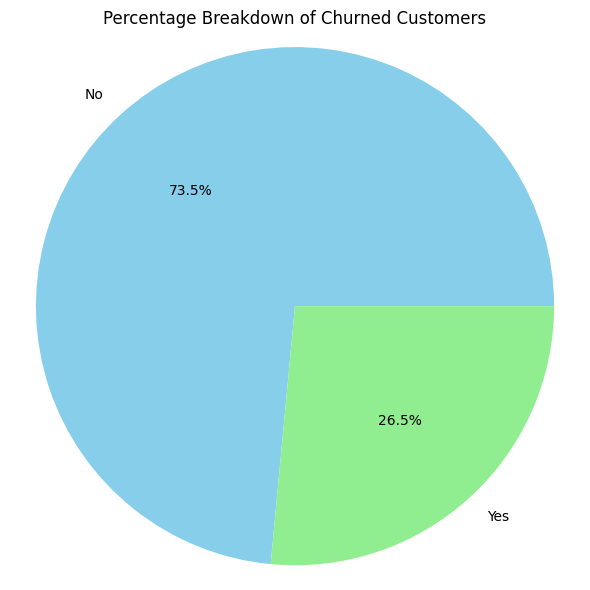

In [51]:

churn_percentage = trn_data['Churn'].value_counts(normalize=True) * 100


# Create a pie chart for the percentage breakdown of churned customers
plt.figure(figsize=(6, 6))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Percentage Breakdown of Churned Customers')
plt.axis('equal') 
plt.tight_layout()
plt.show()


5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)


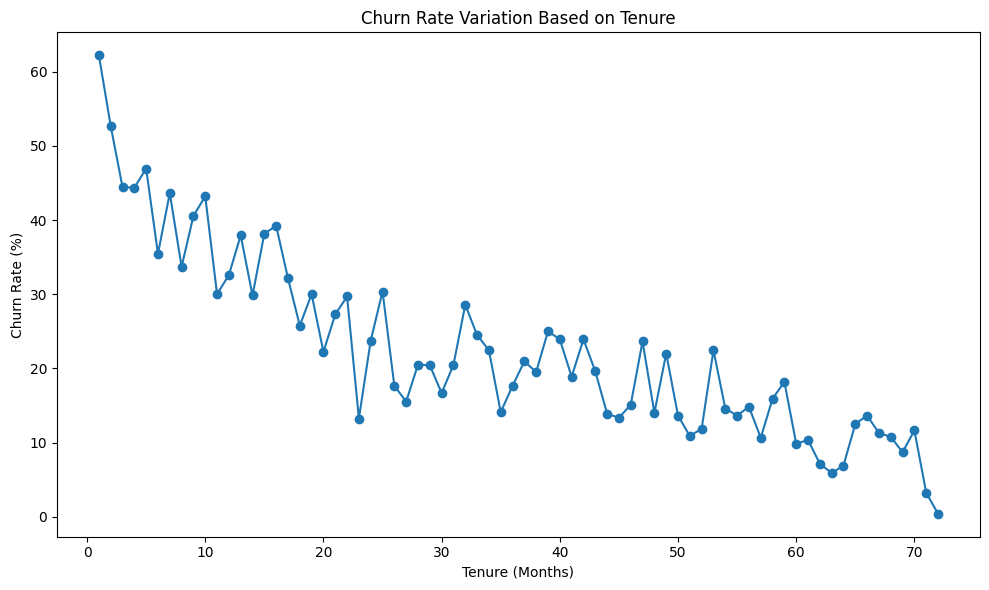

In [52]:
# Calculate churn rates for each tenure
churn_rates = trn_data.groupby('tenure')['Churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100


# Create a line chart for churn rates over tenure
plt.figure(figsize=(10, 6))
plt.plot(churn_rates.index, churn_rates.values, marker='o', linestyle='-')
plt.title('Churn Rate Variation Based on Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()



bivariate & multivariate analysis

6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)


In [53]:
# Define tenure ranges

tenure_bins = [0, 13, 25, 37, 49, 61, 73, np.inf]  # Using unique values


# Define labels for tenure ranges
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '72+']

# Create a new column 'TenureRange' categorizing tenure into ranges
trn_data['TenureRange'] = pd.cut(trn_data['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)


In [54]:

service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Group by tenure and sum the service subscriptions
tenurerange_service_distribution = trn_data.groupby('TenureRange')[service_columns].sum()

# Create a stacked bar chart for service distribution based on tenure
tenurerange_service_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Service Distribution Based on Tenure')
plt.xlabel('Tenure Ranges')
plt.ylabel('Number of Subscriptions')
plt.legend(title='Services', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: no numeric data to plot

### Insights

Total charge calculation is supposed to be (tenure * monthly charge ) but in some rows that is not the case 
tenure=0 means the customer stayed for some days but less than a month but the total charge for these is null so we are to change that to monthly charge = total charge.
They did not churn because they all have a 2 year contract.



### Data preparation

In [56]:
trn_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharge,TenureRange
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,NaN,0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.950001,1936.300026,No,NaN,25-36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.849998,107.699997,Yes,NaN,0-12


In [57]:
X= trn_data.drop('Churn', axis=1)

In [58]:
y= trn_data['Churn']

### split data into training and evaluation

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer to fill missing values with mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mode')

# Fit and transform imputer on training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [ ]:

# Assuming X_train_imputed and X_test_imputed are the imputed feature matrices
# and categorical_cols contains the names of categorical columns to be encoded

# Convert imputed arrays back to DataFrames (if they are not DataFrames already)
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Perform one-hot encoding using get_dummies for each categorical column
# Replace categorical_cols with your actual categorical column names
categorical_cols = ['column1', 'column2', 'column3']  # Replace with your column names
X_train_encoded = pd.get_dummies(X_train_imputed_df, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test_imputed_df, columns=categorical_cols)

# Now X_train_encoded and X_test_encoded contain the encoded features


In [ ]:
# Initialize and train your classifier (Random Forest as an example)
clf = RandomForestClassifier()
clf.fit(X_train_encoded, y_train)

# Make predictions on test set
predictions = clf.predict(X_test_encoded)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model: {accuracy}")
